In [41]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv

In [42]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Mall_customers.csv')

# Display the first few rows of the DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [43]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [44]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
# Replace string values with numerical values
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Display the first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


C:\Users\sojan\AppData\Local\Temp\ipykernel_13596\2770536943.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


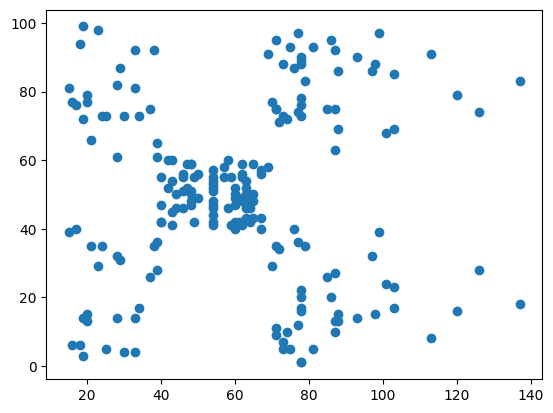

In [46]:
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.show()

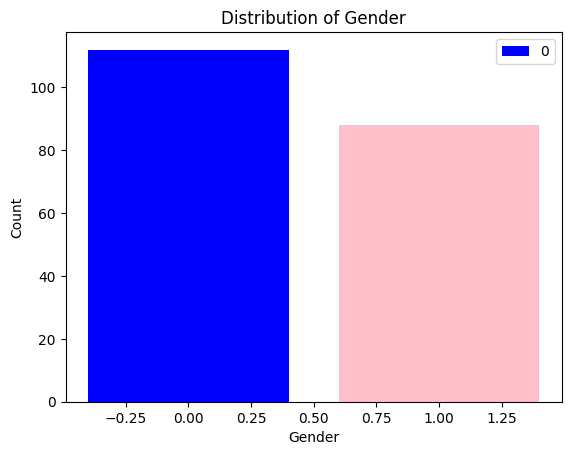

In [47]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the gender data
gender_count = df['Gender'].value_counts()

plt.bar(x=gender_count.index, height=gender_count.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Adding legend
plt.legend(gender_count.index)

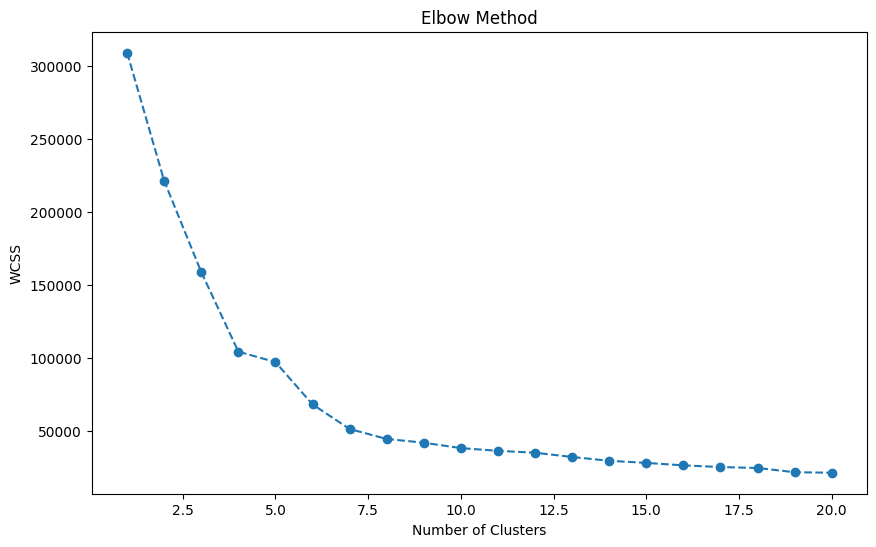

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecting the number of clusters using the Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df.iloc[:, 2:])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df.iloc[:, 2:])

KMeans(n_clusters=5, random_state=42)

In [50]:
df['Cluster'] = kmeans.labels_

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.247191  0.382022  46.213483           47.719101   
1        190.000000  0.454545  32.454545          108.181818   
2         30.586207  0.482759  24.689655           29.586207   
3        162.000000  0.526316  40.394737           87.000000   
4        145.575758  0.454545  31.787879           76.090909   

         Spending Score (1-100)  
Cluster                          
0                     41.797753  
1                     82.727273  
2                     73.655172  
3                     18.631579  
4                     77.757576  


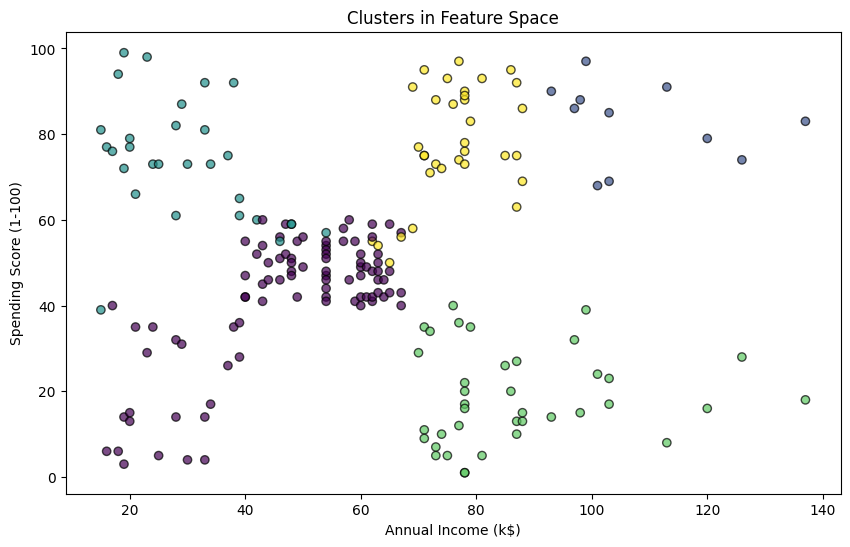

In [51]:
# Plot clusters in 2D feature space
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Clusters in Feature Space')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

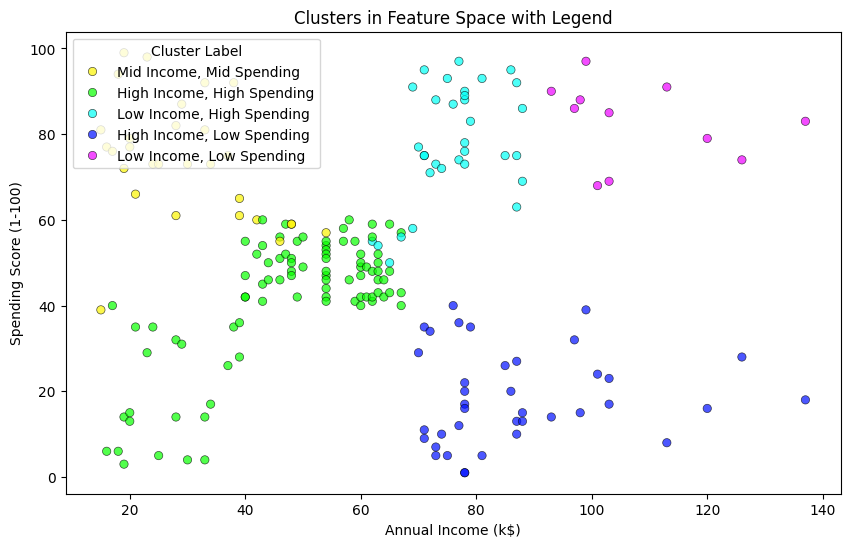

In [52]:
import seaborn as sns
# Define labels for clusters based on analysis
cluster_labels = {
    0: 'High Income, High Spending',
    1: 'Low Income, Low Spending',
    2: 'Mid Income, Mid Spending',
    3: 'High Income, Low Spending',
    4: 'Low Income, High Spending'
}

# Assign labels to clusters
df['Cluster Label'] = df['Cluster'].map(cluster_labels)
# Define a custom color palette with distinctly different colors
custom_palette = sns.color_palette('hsv', n_colors=len(df['Cluster Label'].unique()))

# Plot clusters in 2D feature space with legend using the custom palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster Label', palette=custom_palette, edgecolor='k', alpha=0.7)
plt.title('Clusters in Feature Space with Legend')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label', loc='upper left')
plt.show()